In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_small.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,pregnancy_occurence,glucose_concentration,blood_pressure,triceps_foldness,serum_insulin,bmi,predigree_function,age,target
0,0.000000,0.432161,0.557377,0.507937,0.000000,0.533532,0.068318,0.066667,0.0
1,0.000000,0.587940,0.655738,0.492063,0.062648,0.673621,0.004697,0.050000,0.0
2,0.117647,0.638191,0.377049,0.333333,0.395981,0.512668,0.041845,0.016667,0.0
3,0.235294,0.572864,0.524590,0.000000,0.000000,0.430700,0.020495,0.050000,0.0
4,0.176471,0.437186,0.491803,0.285714,0.000000,0.324888,0.156277,0.000000,0.0


In [4]:
test.head()

,pregnancy_occurence,glucose_concentration,blood_pressure,triceps_foldness,serum_insulin,bmi,predigree_function,age,target
0,0.352941,0.492462,0.475410,0.523810,0.224586,0.506706,0.150299,0.366667,0.0
1,0.117647,0.562814,0.614754,0.507937,0.000000,0.532042,0.029889,0.000000,0.0
2,0.117647,0.542714,0.524590,0.000000,0.000000,0.459016,0.034159,0.000000,0.0
3,0.470588,0.537688,0.655738,0.000000,0.000000,0.366617,0.332195,0.216667,0.0
4,0.411765,0.683417,0.737705,0.000000,0.000000,0.445604,0.056362,0.483333,0.0


In [5]:
x_train_use, y_train_use= train.drop('target', axis=1), train['target']

In [6]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [7]:
x_train.shape

(392, 8)

### Random Forest Classifier

In [8]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 7)),
    'n_estimators': [10,20,30,40,50]
}


In [9]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)


In [10]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [11]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [12]:
best_param

{'max_depth': 6, 'max_features': 4, 'n_estimators': 30}

In [13]:
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=30)

In [14]:
y_pred=best_model.predict(x_train)

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       227
         1.0       0.97      0.93      0.95       165

    accuracy                           0.96       392
   macro avg       0.96      0.95      0.96       392
weighted avg       0.96      0.96      0.96       392



In [16]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.savefig("../conf/"+title+".png")
    plt.show()

<AxesSubplot:>

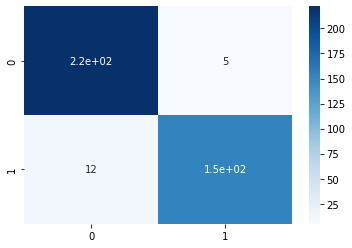

In [17]:
conf=confusion_matrix(y_train, y_pred)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [18]:
#plot_confusion_matrix("Random_Forest_Classfier_Train",conf)

In [19]:
y_pred_val=best_model.predict(x_val)

In [20]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        51
         1.0       0.82      0.69      0.75        48

    accuracy                           0.78        99
   macro avg       0.79      0.78      0.78        99
weighted avg       0.78      0.78      0.78        99



In [21]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

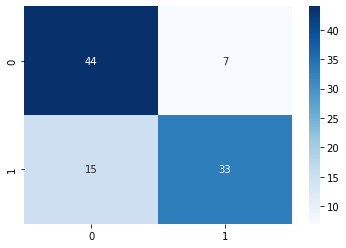

In [22]:
#plot_confusion_matrix("Random_Forest_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [23]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapsed=time.time()-start

In [24]:
pred_use= best_model.predict(x_train_use)

In [25]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.81818182, 0.78481013, 0.81927711, 0.71428571, 0.75949367])

In [26]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       278
         1.0       0.92      0.91      0.92       213

    accuracy                           0.93       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.93      0.93      0.93       491



In [27]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [28]:
x_test, y_test= test.drop('target', axis=1), test['target']

In [29]:
pred_test=best_model.predict(x_test)

In [30]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77        99
         1.0       0.60      0.78      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.73      0.74       154



In [31]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [32]:
conf_test=confusion_matrix(y_test, pred_test)

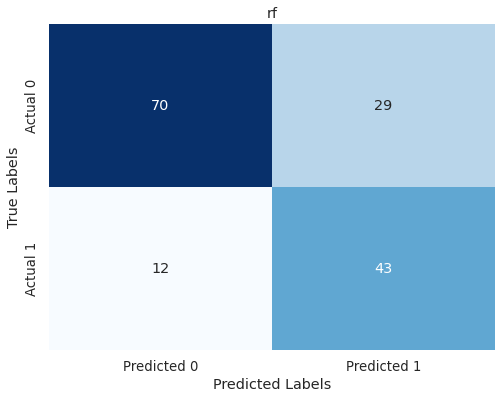

In [33]:
plot_confusion_matrix("rf",conf_test)

In [34]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Random Forest"
df["elapsed"] = elapsed

In [35]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.677165,0.917258,0.92381,0.597222,0.910798,0.781818,Random Forest,0.092609


In [36]:
df.to_csv("../results/regular/rf.csv", index=False)